Step-by-Step Implementation
1. Load and Prepare the Dataset
2. Define the Classification Algorithms
3. Train, Predict, and Evaluate Metrics
4. Determine the Best Algorithm

##**1. Load and Prepare the Dataset**

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Load dataset (you can replace this with any dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optional: Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [2]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##**2. Define the Classification Algorithms**##


We need to import the necessary classifiers from scikit-learn and other libraries:

In [4]:
 pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [5]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, PassiveAggressiveClassifier, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

# Note: XGBoost, LightGBM, CatBoost, CNN, RNN, LSTM require additional libraries
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'Ridge Classifier': RidgeClassifier(),
    'Perceptron': Perceptron(),
    'Passive Aggressive': PassiveAggressiveClassifier(),
    'SGD Classifier': SGDClassifier(),
    'SVC': SVC(probability=True),
    'Linear SVC': LinearSVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Gaussian NB': GaussianNB(),
    'Multinomial NB': MultinomialNB(),
    'Bernoulli NB': BernoulliNB(),
    'MLP': MLPClassifier(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Process Classifier': GaussianProcessClassifier(),
    # Voting Classifier and Stacking Classifier can be added later using multiple of these base classifiers
}


In [6]:
# pip install dask[dataframe]

##**3. Train, Predict, and Evaluate Metrics**##

Train each model, predict on the test set, and evaluate performance using various metrics:

In [7]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    #roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
       # 'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Classification Report': report
    })

# Display the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1 Score: {result['F1 Score']:.4f}")
   # print(f"ROC AUC: {result['ROC AUC']}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 60)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.219973
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Model: Logistic Regression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

------------------------------------------------------------
Model: LDA
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy

# Evaluation Metrics in Classification

## Confusion Matrix

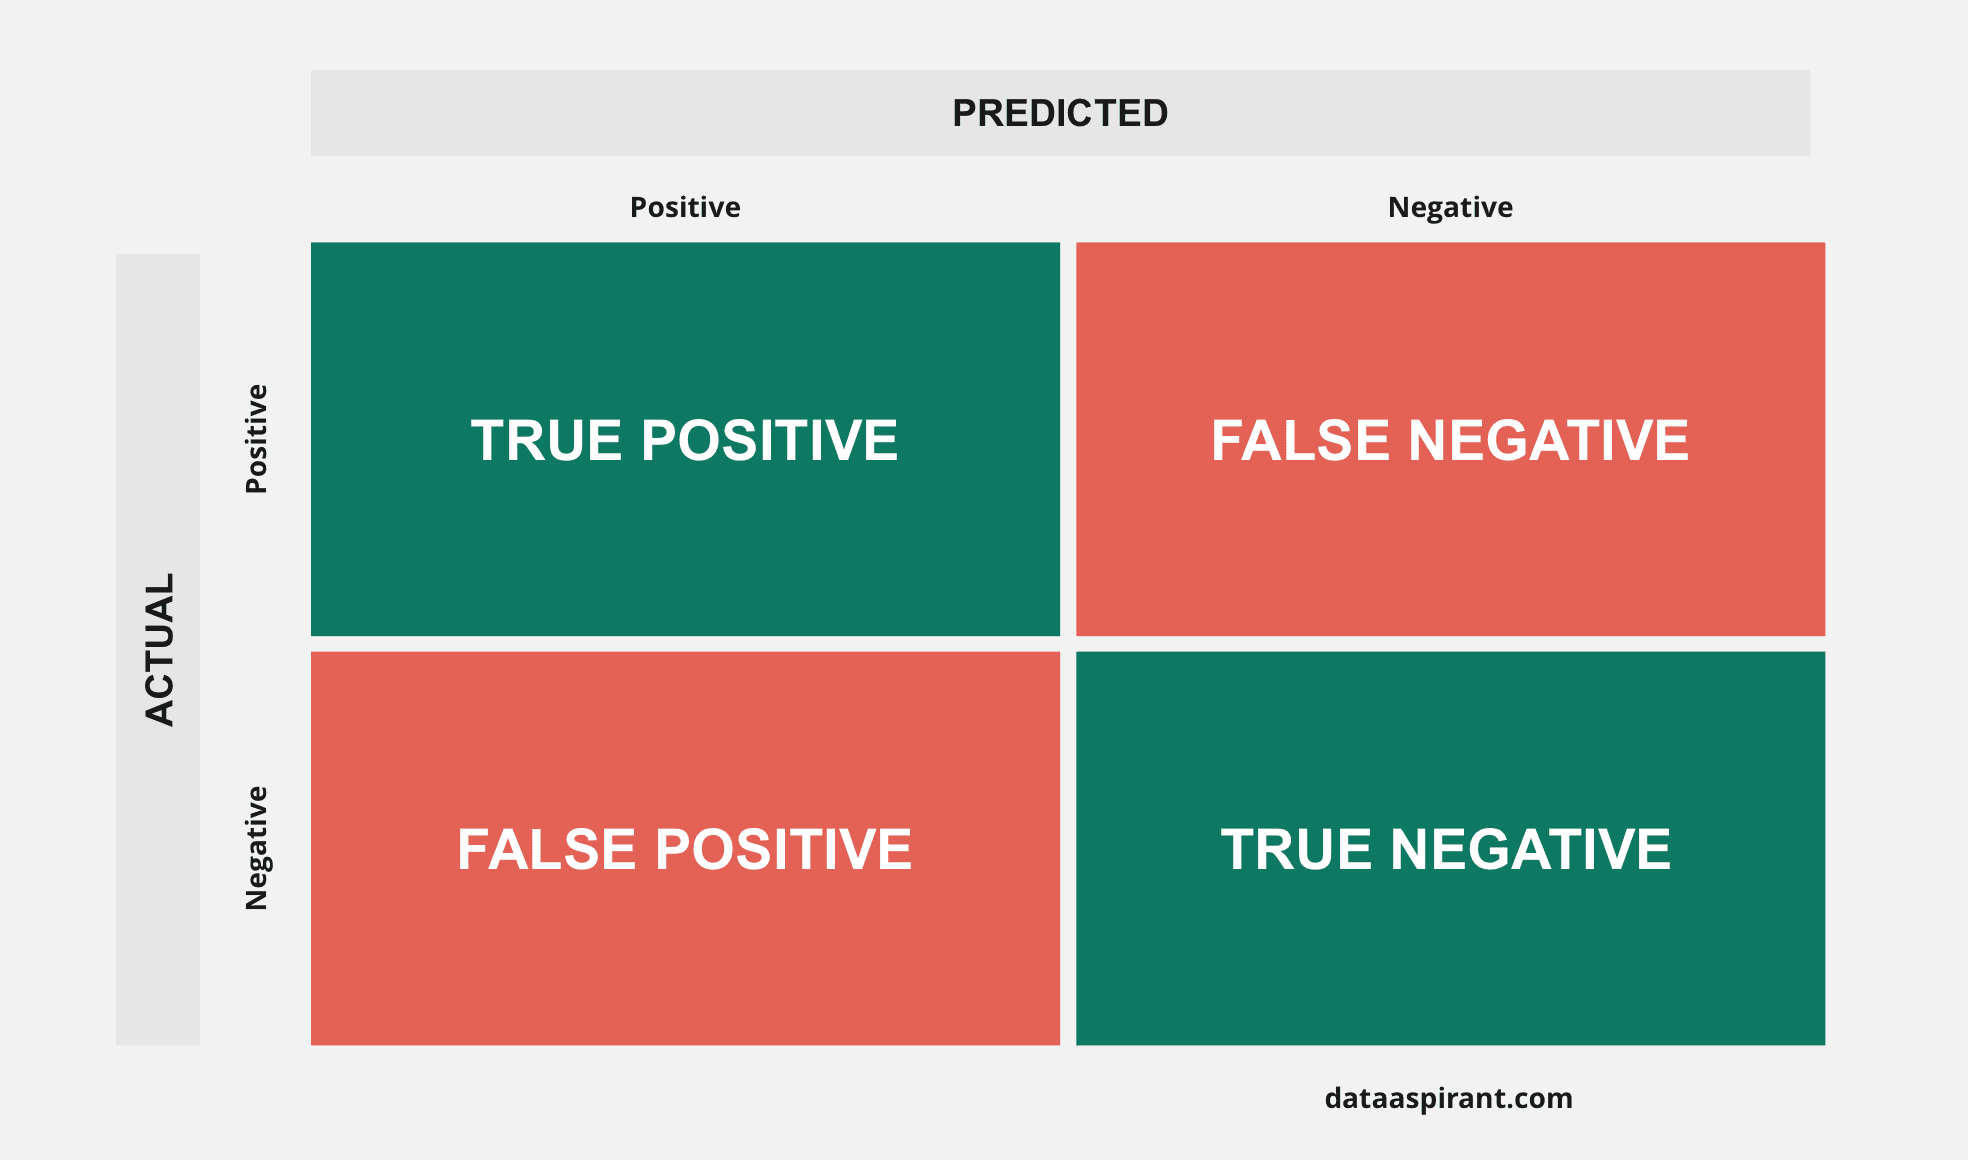

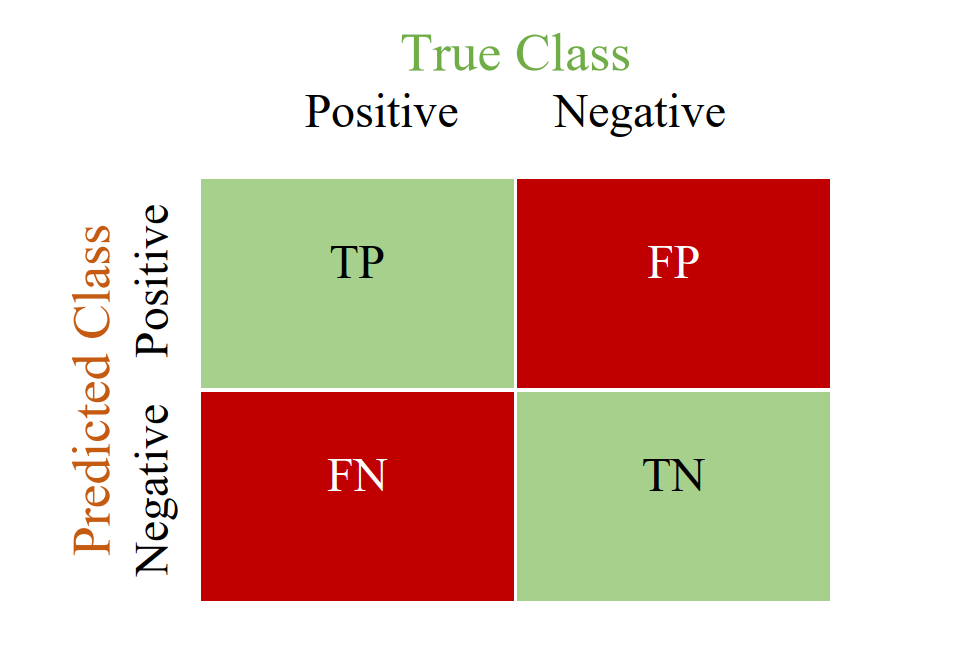

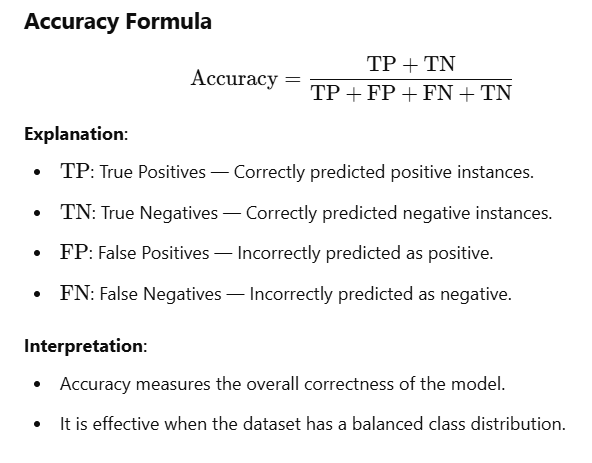

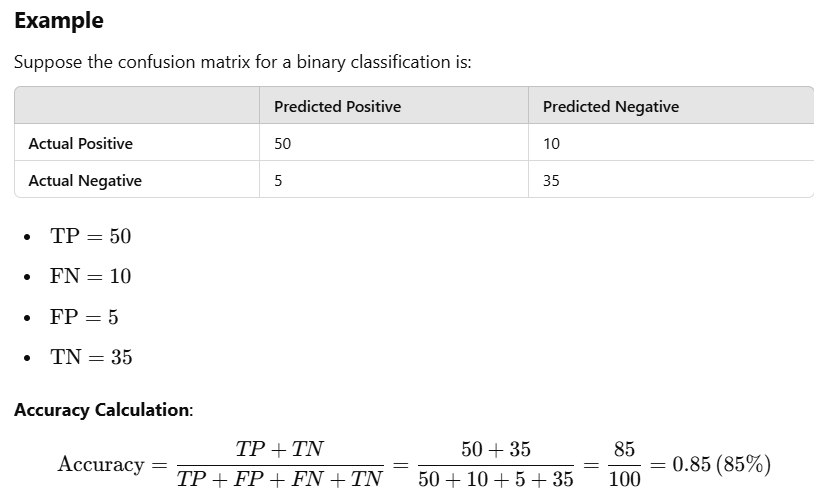

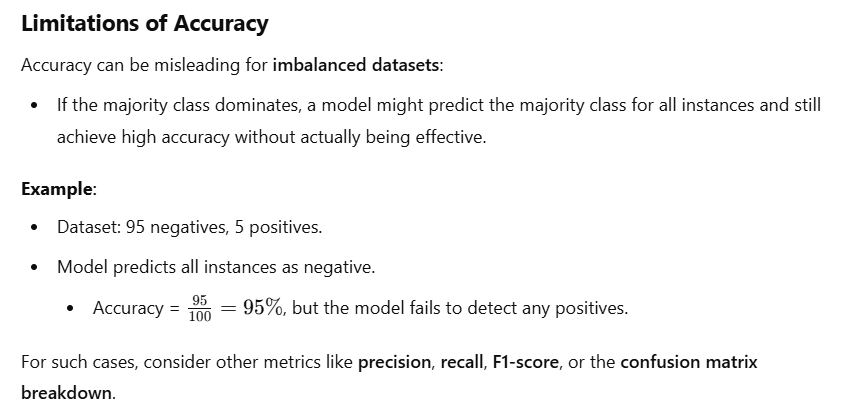

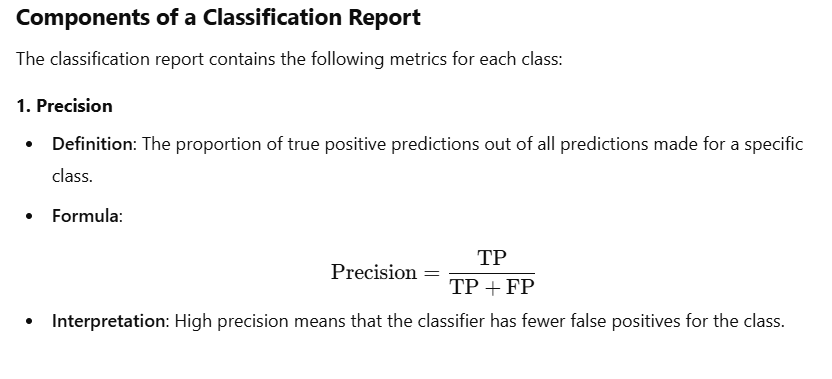

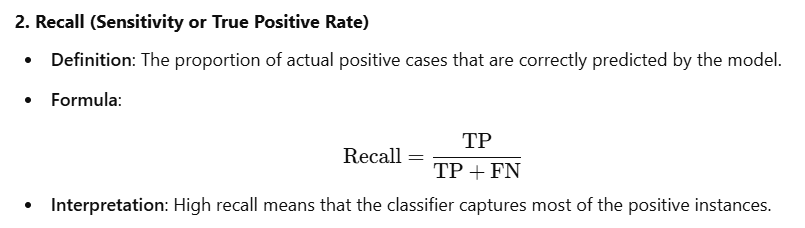

Precision focuses on the accuracy of the positive predictions, while recall focuses on the ability of the model to find all the positive cases.

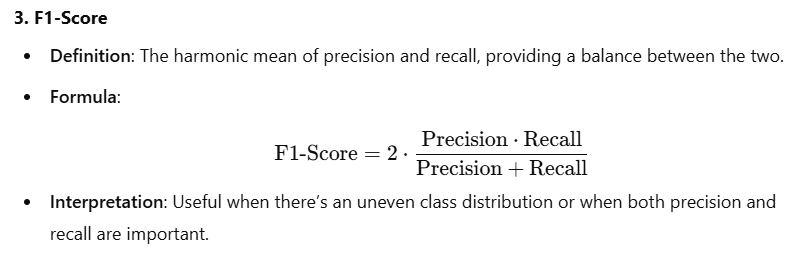

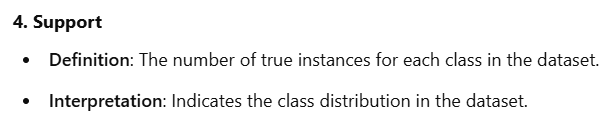

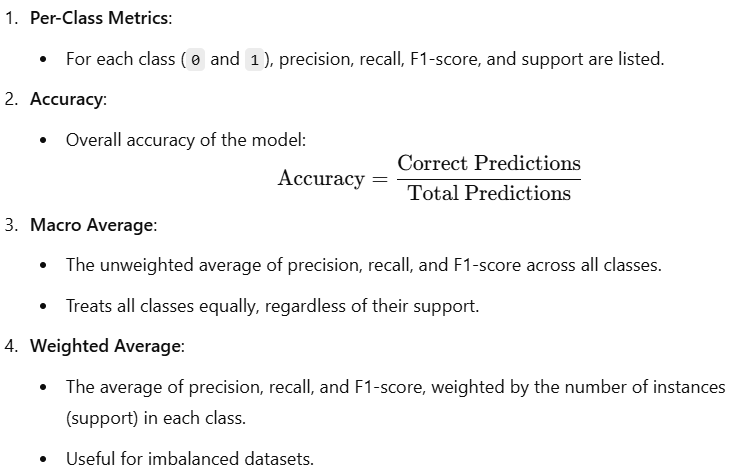

**When to Use a Classification Report**
  - Balanced Dataset: Use the metrics as is, focusing on F1-score.
  - Imbalanced Dataset: Pay attention to weighted averages and the individual class metrics (especially for minority classes).

##**4. Determine the Best Algorithm**##
After running the above code, you will have a detailed comparison of all algorithms. The best algorithm can be selected based on the highest metrics that are most relevant to your problem (e.g., accuracy, F1 score, ROC AUC).

##**Special Considerations:**##

##**CNNs, RNNs, LSTMs:**## These deep learning models typically require frameworks like TensorFlow or PyTorch, and they are more complex to implement for tabular datasets. They are more suited for image or sequence data.

##**Voting and Stacking Classifiers:**## These ensemble methods can combine the above models. You would create these by combining several of the trained classifiers.

In [8]:
# 'LR'=LogisticRegression(random_state=42)
# 'LDA'= LinearDiscriminantAnalysis(),
#     'Ridge Classifier': RidgeClassifier(),
#     'Perceptron': Perceptron(),
#     'Passive Aggressive': PassiveAggressiveClassifier(),
#     'SGD Classifier': SGDClassifier(),
#     'SVC': SVC(probability=True),
#     'Linear SVC': LinearSVC(),
#     'KNN': KNeighborsClassifier(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Extra Trees': ExtraTreesClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'AdaBoost': AdaBoostClassifier(),
#     'XGBoost': xgb.XGBClassifier(),
#     'LightGBM': lgb.LGBMClassifier(),
#     'CatBoost': CatBoostClassifier(verbose=0),
#     'Gaussian NB': GaussianNB(),
#     'Multinomial NB': MultinomialNB(),
#     'Bernoulli NB': BernoulliNB(),
#     'MLP': MLPClassifier(),
#     'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
#     'Gaussian Process Classifier': GaussianProcessClassifier(),

In [9]:
voting_clf_hard = VotingClassifier(estimators=[ ('Logistic Regression', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
('Ridge Classifier', RidgeClassifier()),
('Perceptron',  Perceptron()),
('Passive Aggressive',PassiveAggressiveClassifier()),
('SGD Classifier',SGDClassifier())
], voting='hard')

In [10]:
# 'Ridge Classifier': RidgeClassifier(),
    # 'Perceptron': Perceptron(),
    # 'Passive Aggressive': PassiveAggressiveClassifier(),
    # 'SGD Classifier': SGDClassifier(),
    # 'SVC': SVC(probability=True),
    # 'Linear SVC': LinearSVC(),
    # 'KNN': KNeighborsClassifier(),
    # 'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    # 'Extra Trees': ExtraTreesClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    # 'AdaBoost': AdaBoostClassifier(),
    # 'XGBoost': xgb.XGBClassifier(),
    # 'LightGBM': lgb.LGBMClassifier(),
    # 'CatBoost': CatBoostClassifier(verbose=0),
    # 'Gaussian NB': GaussianNB(),
    # 'Multinomial NB': MultinomialNB(),
    # 'Bernoulli NB': BernoulliNB(),
    # 'MLP': MLPClassifier(),
    # 'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    # 'Gaussian Process Classifier': GaussianProcessClassifier(),

In [11]:
voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('LDA', LinearDiscriminantAnalysis()),
                             ('Ridge Classifier', RidgeClassifier()),
                             ('Perceptron', Perceptron()),
                             ('Passive Aggressive',
                              PassiveAggressiveClassifier()),
                             ('SGD Classifier', SGDClassifier())])

In [12]:
y_pred_hard = voting_clf_hard.predict(X_test)

In [13]:
# Evaluate performance
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f'Hard Voting Classifier Accuracy: {accuracy_hard:.4f}')

Hard Voting Classifier Accuracy: 0.8889


In [14]:
# 'LR'=LogisticRegression(random_state=42)
# 'LDA'= LinearDiscriminantAnalysis(),
#     'Ridge Classifier': RidgeClassifier(),
#     'Perceptron': Perceptron(),
#     'Passive Aggressive': PassiveAggressiveClassifier(),
#     'SGD Classifier': SGDClassifier(),
#     'SVC': SVC(probability=True),
#     'Linear SVC': LinearSVC(),
#     'KNN': KNeighborsClassifier(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Extra Trees': ExtraTreesClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'AdaBoost': AdaBoostClassifier(),
#     'XGBoost': xgb.XGBClassifier(),
#     'LightGBM': lgb.LGBMClassifier(),
#     'CatBoost': CatBoostClassifier(verbose=0),
#     'Gaussian NB': GaussianNB(),
#     'Multinomial NB': MultinomialNB(),
#     'Bernoulli NB': BernoulliNB(),
#     'MLP': MLPClassifier(),
#     'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
#     'Gaussian Process Classifier': GaussianProcessClassifier(),

In [45]:
# Create a Voting Classifier (Soft Voting)
voting_clf_soft = VotingClassifier(estimators=[
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('knnLinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
    ('Ridge Classifier', RidgeClassifier()),
    ('Perceptron',  Perceptron()),
    ('Passive Aggressive',PassiveAggressiveClassifier()),
    ('SGD Classifier',SGDClassifier())
], voting='soft')

# Train the Voting Classifier
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(random_state=42)),
                             ('knnLinearDiscriminantAnalysis',
                              LinearDiscriminantAnalysis()),
                             ('Ridge Classifier', RidgeClassifier()),
                             ('Perceptron', Perceptron()),
                             ('Passive Aggressive',
                              PassiveAggressiveClassifier()),
                             ('SGD Classifier', SGDClassifier())],
                 voting='soft')

In [46]:
# Create a Voting Classifier (Soft Voting)
voting_clf_soft = VotingClassifier(estimators=[
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('knnLinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
    # 'Ridge Classifier': RidgeClassifier(),  # Removed as it doesn't support predict_proba
    # ('Perceptron',  Perceptron()), # Removed as it doesn't support predict_proba
    ('Passive Aggressive',PassiveAggressiveClassifier()),
    ('SGD Classifier',SGDClassifier())
], voting='soft')

In [47]:
# Train the Voting Classifier
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(random_state=42)),
                             ('knnLinearDiscriminantAnalysis',
                              LinearDiscriminantAnalysis())],
                 voting='soft')

In [48]:
# Make predictions
y_pred_soft = voting_clf_soft.predict(X_test)

In [49]:
# Evaluate performance
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f'Soft Voting Classifier Accuracy: {accuracy_soft:.4f}')

Soft Voting Classifier Accuracy: 1.0000
